In [1]:
import circle
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy import stats, signal, ndimage, optimize, interpolate, optimize
import matplotlib
from tqdm import tqdm
import pandas as pd
from pylab import mpl

In [2]:
#path=r"F:\20240729_FeGe\09_FeGe_LMSTEM_obj5p00_95K_CSA0p38mrad_FOV458nm_MAG200kx_128_128_BC80pA_CL18m\scan_x128_y128.raw"
path=r"D:\2023_11_04_YNB\06_35000x_alpha0p42\scan_x128_y128.raw"
# Read data
data = circle.readData(path)
imgh, imgw, pxh, pxw = data.shape

In [3]:
# Select one of the diffraction disks
# Process the data array by replacing NaN values with 0, shifting the data values to non-negative,and adding a small positive offset.
data_one_pat = circle.handData(data[1][1])


# Normalize the data array and convert it to a grayscale pixel value range
show_one_pat = (((data_one_pat - data_one_pat.min()) / (data_one_pat.max() - data_one_pat.min())) * 255).astype(np.uint8)

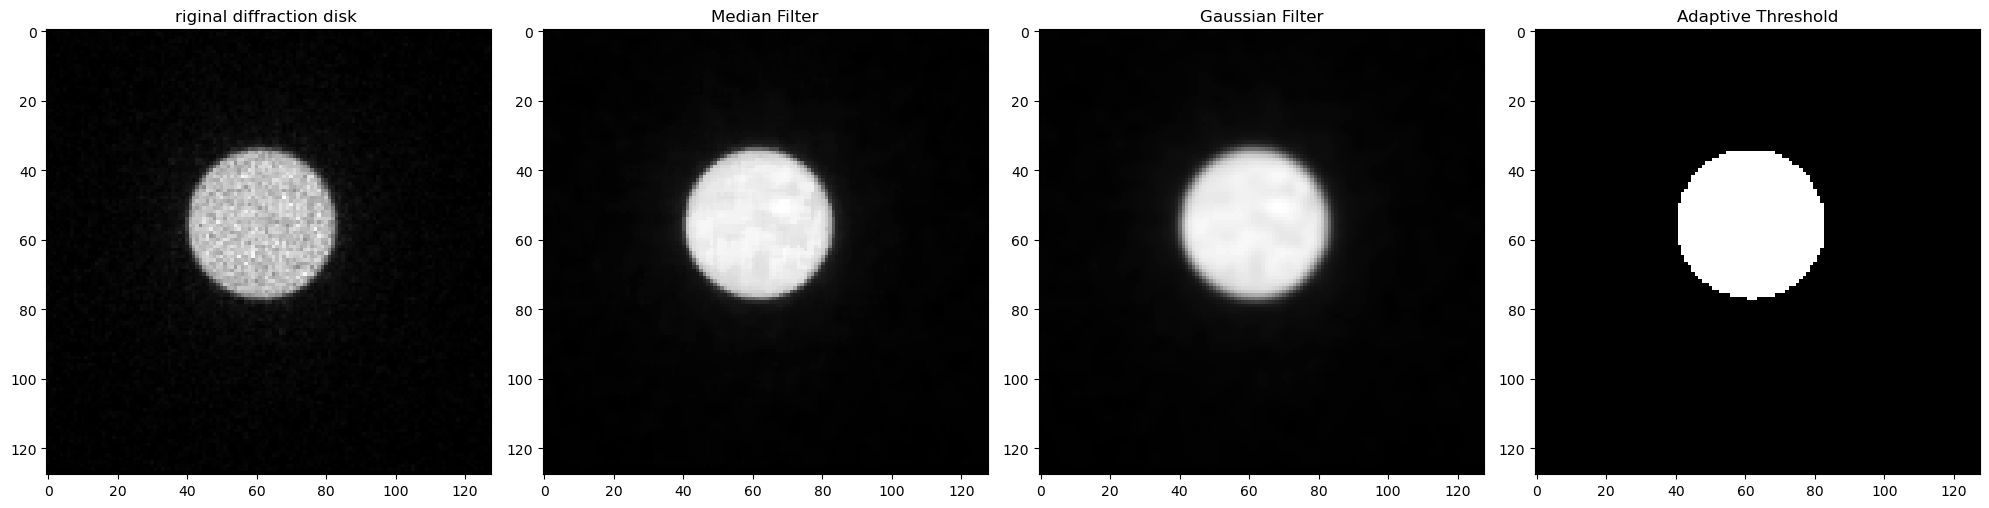

In [4]:
# Preprocessing steps can be manually changed or replaced by a better method
# Median Filter
show_one_pat1 = cv2.medianBlur(show_one_pat, 5)
# Gaussian Filter
show_one_pat2 = cv2.GaussianBlur(show_one_pat1, (5, 5), 0)
# Adaptive Threshold
ret, show_one_pat3 = cv2.threshold(show_one_pat2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(show_one_pat, cmap='gray')
axs[0].set_title('riginal diffraction disk ')  
axs[1].imshow(show_one_pat1, cmap='gray')
axs[1].set_title('Median Filter')  
axs[2].imshow(show_one_pat2, cmap='gray')
axs[2].set_title('Gaussian Filter')  
axs[3].imshow(show_one_pat3, cmap='gray')
axs[3].set_title('Adaptive Threshold')  
plt.tight_layout()  
plt.show()

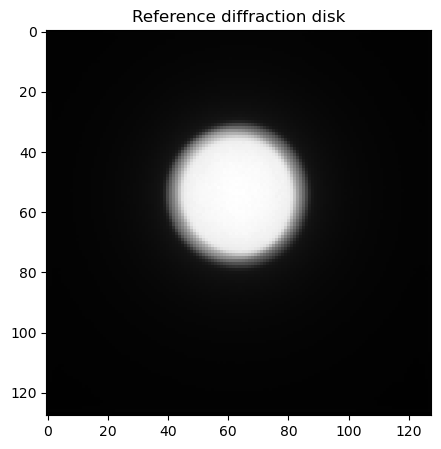

In [5]:
# Diffraction disk superposition
ref = np.nansum(data, axis=(0, 1)) / (imgh * imgw)
# Create a graphics window
fig, ax = plt.subplots( figsize=(5, 5))
ax.imshow(ref, cmap='gray')
ax.set_title('Reference diffraction disk')  
plt.show()
#The presence of dots on the diffraction disk indicates that there is a problem with the data of some diffraction disks.

ref_x= 62.82871096479253 ref_y= 53.95135891002734 ref_r= 21.683431428778015


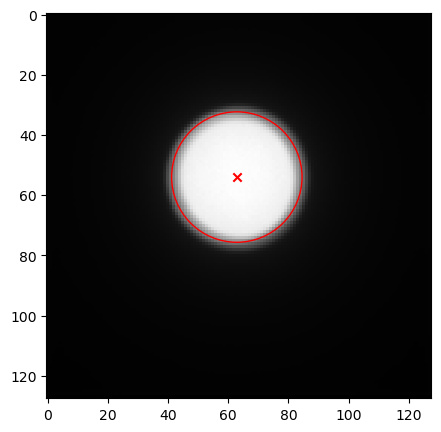

In [6]:
# Fitting circle
ref = (((ref - ref.min()) / (ref.max() - ref.min())) * 255).astype(np.uint8)  # Normalize and convert to uint8
binary = circle.filtering(ref)
ref_y, ref_x, ref_r = circle.find_circle_in_image(binary)  # Fit a circle to the reference pattern
print('ref_x=', ref_x, 'ref_y=', ref_y, 'ref_r=', ref_r)
# Create a graphics window
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(ref, cmap='gray')
c = plt.Circle((ref_x, ref_y),ref_r, color='red', linewidth=1, fill=False)
plt.scatter([ref_x], [ref_y], color='red', marker='x', label='True Center')
ax.add_patch(c)
plt.show()

x= 61.51282051282051 y= 55.56895356895357


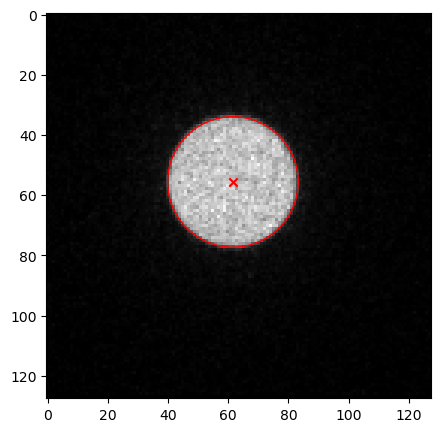

In [7]:
# Call the centroid method to calculate

#     Parameters
#     ----------
#     data (np.ndarray): Input data array, expected to be a 2D NumPy array.  
#     flag (bool, optional): If True, apply filtering to the data before calculating the centroid. Defaults to False. 

#x, y = circle.calculate_centroid(show_one_pat)# After preprocessing
x, y = circle.calculate_centroid(show_one_pat,flag=True)#preprocessing
print('x=', x, 'y=', y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(show_one_pat, cmap='gray')
r=21.7 # radius
c = plt.Circle((x, y),r, color='red', linewidth=1, fill=False)
plt.scatter([x], [y], color='red', marker='x', label='True Center')
ax.add_patch(c)
plt.show()

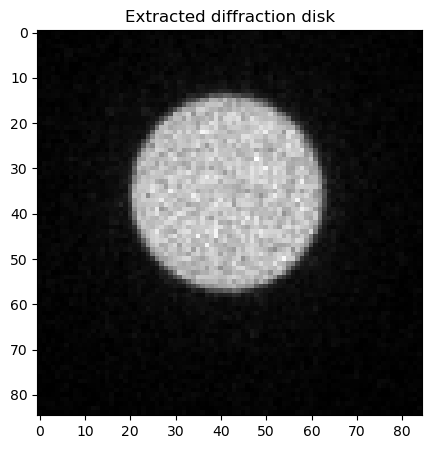

In [8]:
# test
A = [20, 105]
B1 = [105, 20]  
B2 = 85  
"""
Function to extract a rectangular region from a 2D array (matrix) based on specified parameters.

Parameters:
A (tuple): A tuple of two integers (x, y) representing the starting point (upper-left corner) of the region to be extracted.
B (int or list):
  - If an integer, it represents the side length of the square region to be extracted from the starting point A.
  - If a list of two integers, it represents the coordinates (x2, y2) of the opposite corner (lower-right corner) of the rectangular region to be extracted.
C (numpy.ndarray): A 2D numpy array (matrix) from which the region is to be extracted.

Returns:
numpy.ndarray: A 2D numpy array containing the extracted region from the input array C. The shape of the returned array depends on the parameters A and B.
ror: If the specified region exceeds the bounds of the input array C.

"""
region1 = circle.extract_region(A, B1, show_one_pat) 
# Create a graphics window
fig, ax = plt.subplots( figsize=(5, 5))
ax.imshow(region1, cmap='gray')
ax.set_title('Extracted diffraction disk')  
plt.show()

In [9]:
"""
Function to process a 4D array by extracting regions from each 2D slice (3rd and 4th dimensions) based on given parameters.  

Parameters:  
A (tuple): A tuple of two integers (x, y) representing the starting point (upper-left corner) of the region to be extracted from each 2D slice.  
B (int or tuple):   
  - If an integer, it represents the side length of the square region to be extracted from the starting point A.  
  - If a tuple of two integers, it represents the coordinates (x2, y2) of the opposite corner (lower-right corner) of the rectangular region to be extracted.  
array_4d (numpy.ndarray): A 4D numpy array with shape (d1, d2, height, width) where d1 and d2 are the first two dimensions, and height and width are the dimensions of the 2D slices.  

Returns:  
numpy.ndarray: A 4D numpy array with shape (d1, d2, region_height, region_width) where region_height and region_width are determined by the shape of the extracted regions.  
  This array contains the extracted regions from each 2D slice of the input array_4d. If an error occurs during extraction, the corresponding slice in the output array will be filled with zeros.  

"""
regions2 = circle.process_4d_array(A, B1, data)

In [10]:
#You can choose the original data or the cropped data
imgh, imgw, pxh, pxw = regions2.shape
x = []
y = []
a = 0
b = imgh
c = 0
d = imgw

# Loop through each pixel in the image
for i in tqdm(range(c, d, 1)):
    for j in range(a, b, 1):
        data_one_pat = data[i][j]
        # Calculate centroid coordinates based on the selected method
        x_, y_ = circle.calculate_centroid(data_one_pat)
        #x_, y_ = circle.calculate_centroid(data_one_pat,flag=True)
        # Handle cases where the centroid coordinates are out of range or None
        if x_ < 0 or x_ >= pxh:
            x.append(0)
            y.append(0)
        elif x_ is None:
            x.append(0)
            y.append(0)
        else:
            x.append(x_)
            y.append(y_)


100%|███████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 126.92it/s]


In [11]:
# data storage
file_name = r'F:\数据\质心.csv'
data = pd.DataFrame({'x': x, 'y': y})
data.to_csv(file_name, index=False) #save data
x,y = circle.readCsv(file_name)  # Data reading

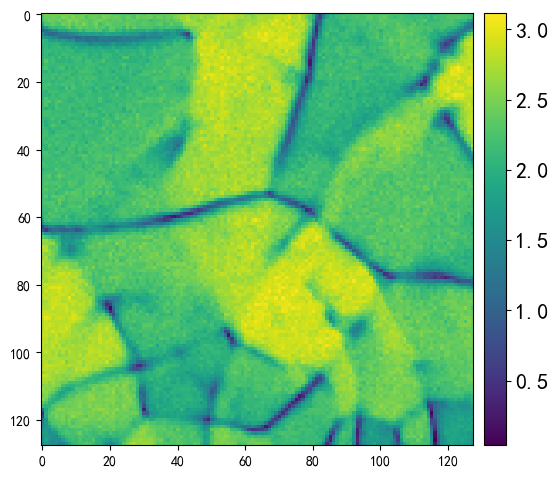

In [12]:
x,y = circle.readCsv(file_name)  # Data reading
i=int(np.sqrt(len(x)))
x=np.array(x)
y=np.array(y)

# Matrix changes to obtain the same direction as the tif image in the collection data folder
x=circle.zy_zh(x.reshape(i,i)).reshape(-1)
y=circle.zy_zh(y.reshape(i,i)).reshape(-1)

# Assuming circle.handle_X_Y is a function to process x, y coordinates  
z, x, y = circle.handle_X_Y(x, y)  
  
# Set matplotlib's font to support Chinese  
mpl.rcParams["font.sans-serif"] = ["SimHei"]  
# Create figure and axes  
fig, axs = plt.subplots(figsize=(6, 6))  
# Reshape and possibly crop z  
z = z.reshape(i, i)  
# Assuming circle.cut is a function to cut or modify the matrix z  
#z = circle.cut(z)  
# Display the image  
im = axs.imshow(z, cmap='viridis')  
# Assuming circle.add_colorbar is a function to add a colorbar  
circle.add_colorbar(im, a=16)  
plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


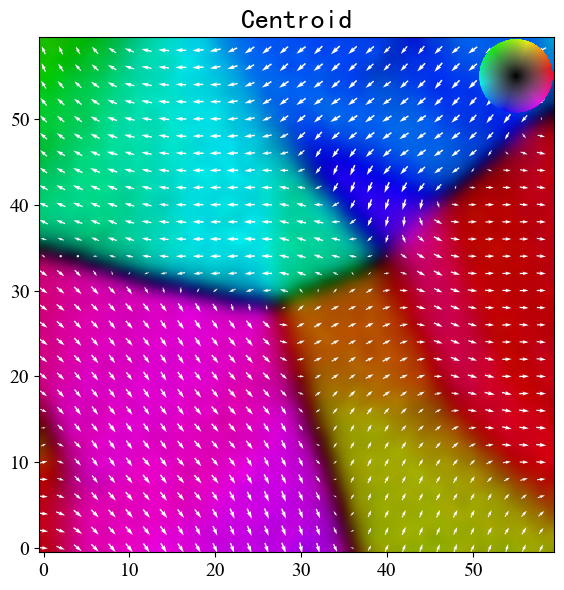

<Figure size 2400x2400 with 0 Axes>

In [13]:
a = 25
b = 85
c = 40
d = 100
scan_rotation = 0.23142782688704822  # Rotation angle obtained from the <scan_rotation></scan_rotation> tags in the XML file of the dataset

angles = -30  # Need to adjust accordingly

# Crop the data to the specified region
x, y = circle.cut_data(x, y, a, b, c, d)

# Set Chinese font for display
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# Create subplots for plotting
fig, axs = plt.subplots(figsize=(6, 6))

# Draw the colored detail image
image = circle.drawing(axs, x, y, scan_rotation, angles=angles, step=2)
axs.set_title("Centroid", fontsize=20, fontweight='bold')
axs.axis('square')

# Plot the data
circle.plot()
#plt.show()